<ipython-input-7-1a1b9f58ccc0>:39: RuntimeWarning: divide by zero encountered in true_divide
  return ((1/(x**2))-(Eps/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))*((1/(x**2))-(1/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))
<ipython-input-7-1a1b9f58ccc0>:33: RuntimeWarning: divide by zero encountered in true_divide
  lhsarr = (((sp.jvp(n, x))/(x*sp.jn(n, x)))-((Eps*rmder)/(y*rmori)))*(((sp.jvp(n, x))/(x*sp.jn(n, x)))-((smder)/(y*smori)))


The intersecting points of the plots:  [0.90593754 2.5176104  3.22187473 4.00958222]
f(x) values related to roots:  [-0.42022242 -0.02476229 -0.00756583 -0.00243498]


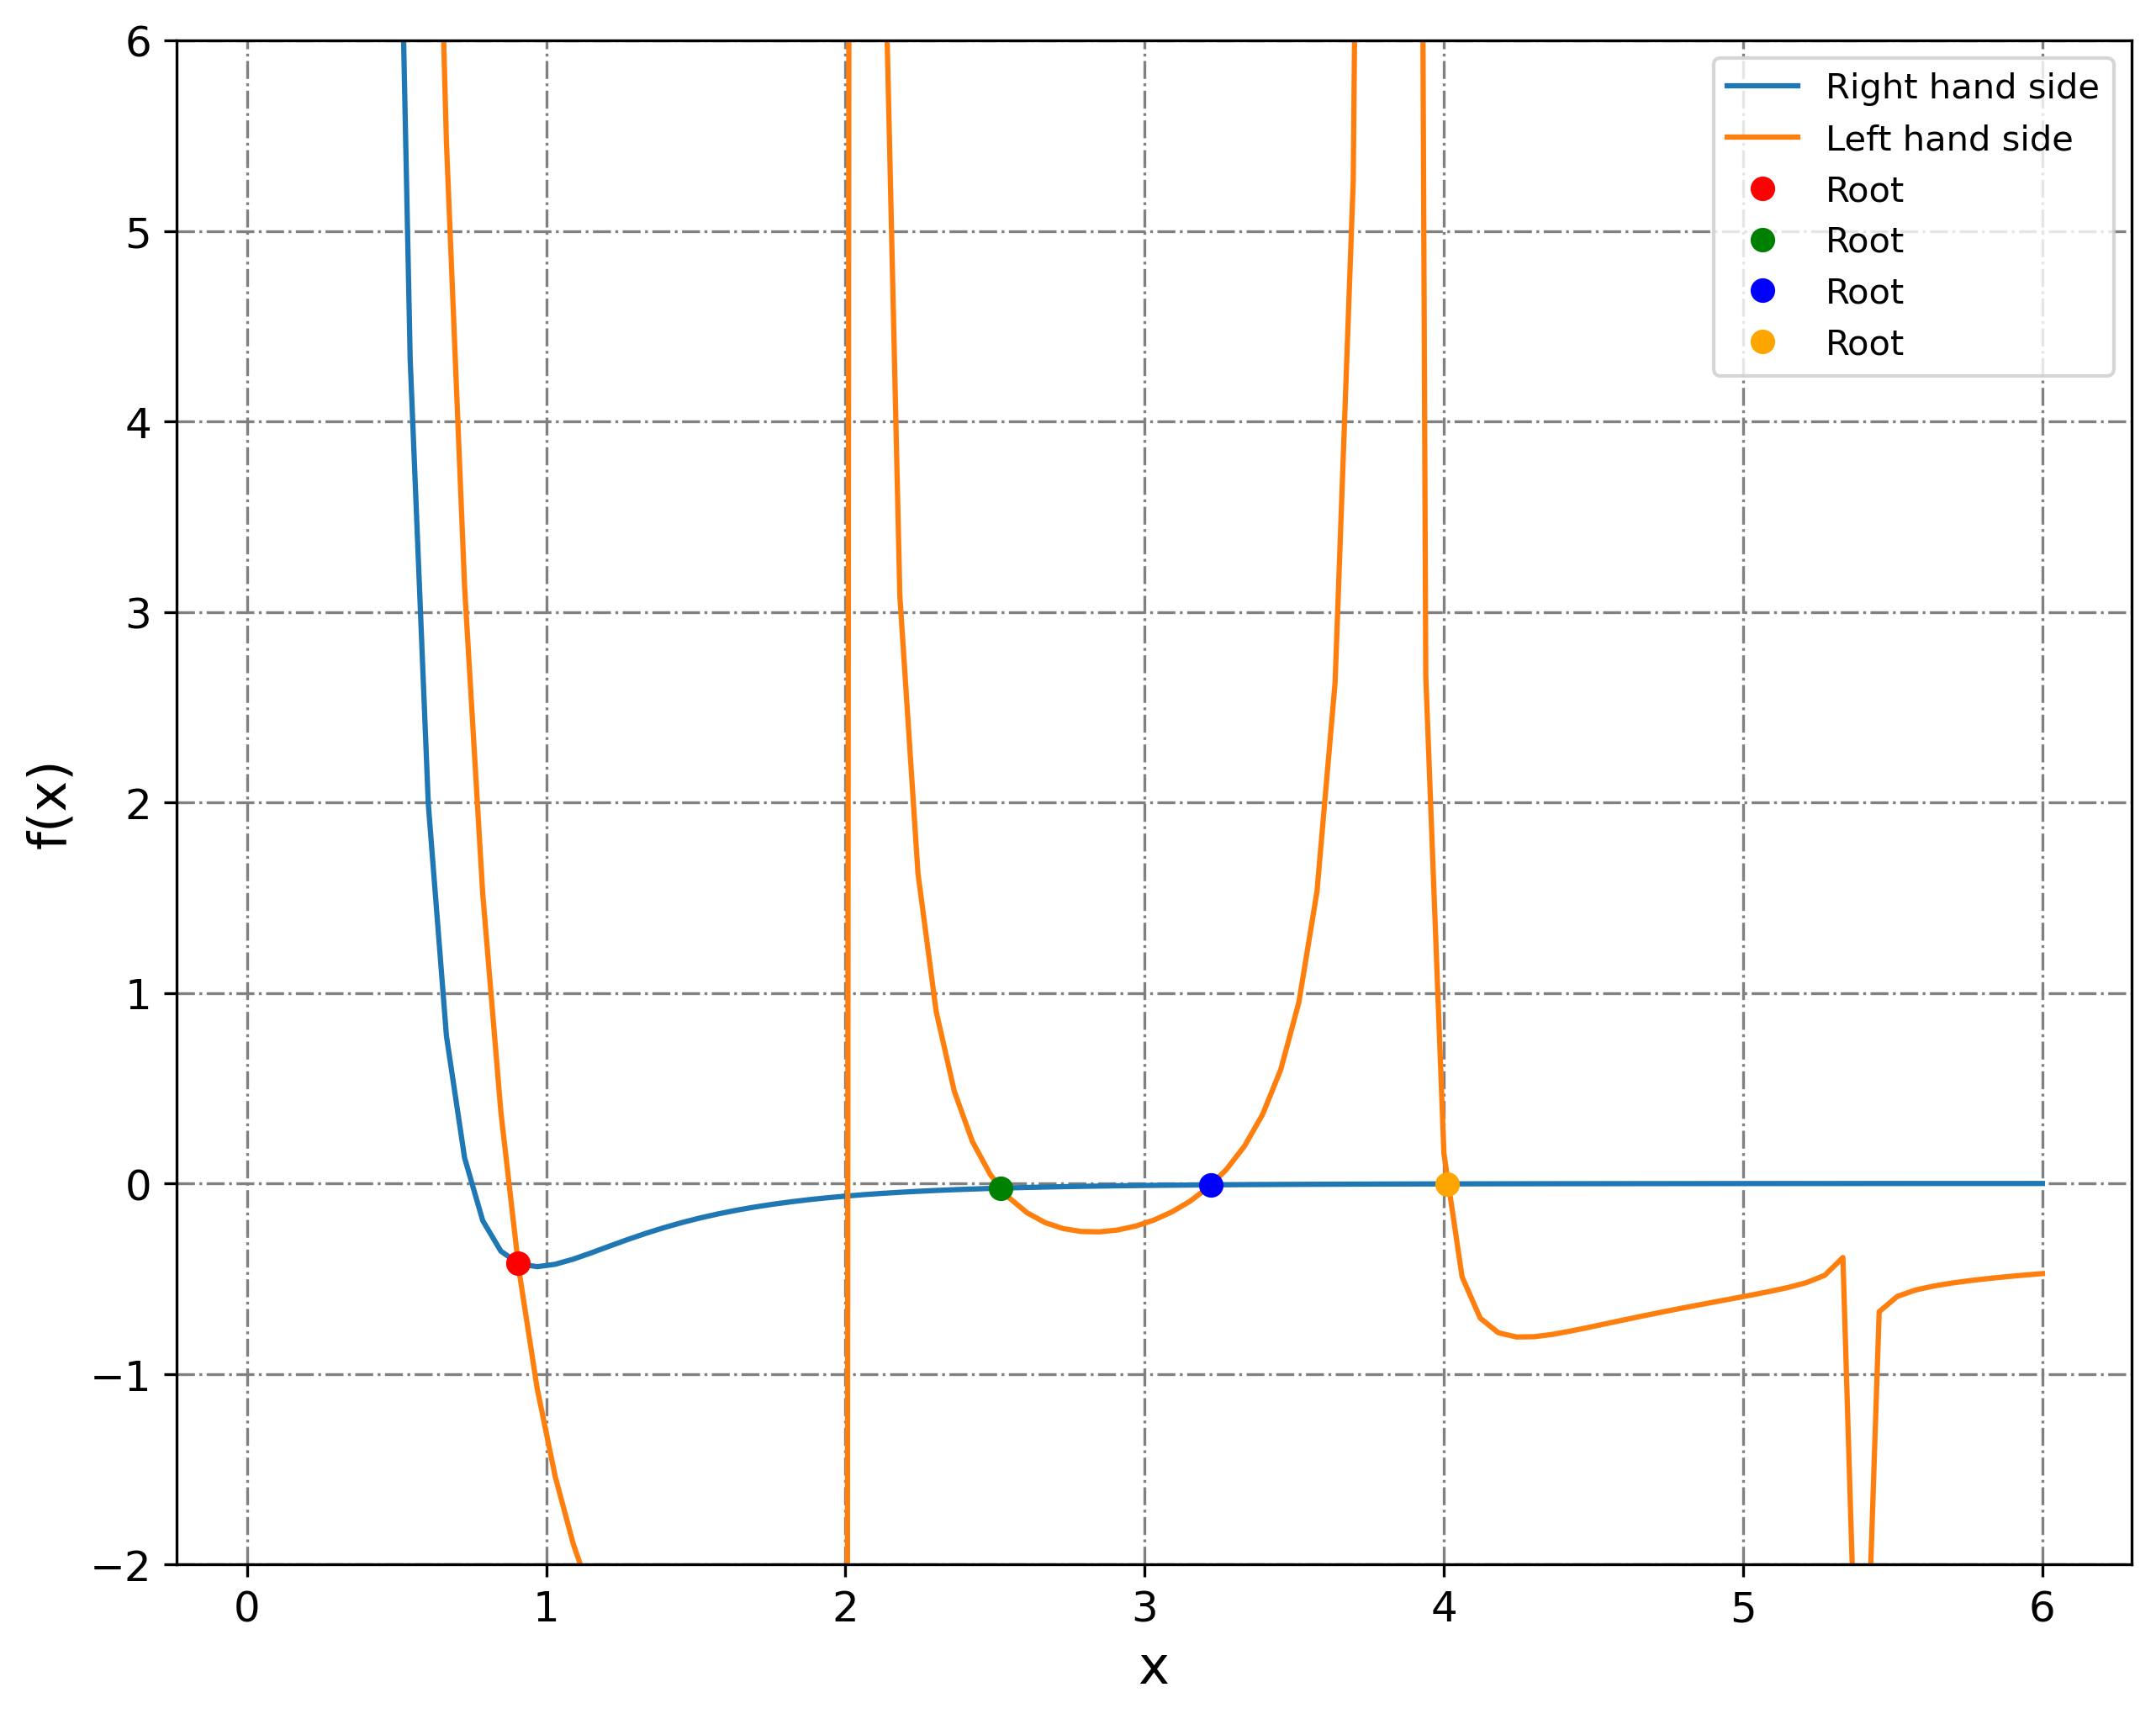

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.optimize as opt

# the initial conditions
Eps = 6.1
a = 0.03568
k0 = (20*(np.pi))/3 #  le nombre d’onde de l’onde incidente

# defining the left hand side of the equation
def lhs_function(x):
    
    # fixing a and b
    a = 0.03568
    b = 0.05567
    # consider the first order of the Bessel function
    n = 1
    
    # y interms of x
    y = np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2)))
    
    # Rm original
    rmori = ((sp.yn(n, ((b/a)*y)))*(sp.jn(n, y)))-((sp.jn(n, ((b/a)*y)))*(sp.yn(n, y)))
    # Rm derivative
    rmder = ((sp.yn(n, ((b/a)*y)))*(sp.jvp(n, y)))-((sp.jn(n, ((b/a)*y)))*(sp.yvp(n, y)))
    # Sm original
    smori = ((sp.yvp(n, ((b/a)*y)))*(sp.jn(n, y)))-((sp.jvp(n, ((b/a)*y)))*(sp.yn(n, y)))
    # Sm derivative
    smder = ((sp.yvp(n, ((b/a)*y)))*(sp.jvp(n, y)))-((sp.jvp(n, ((b/a)*y)))*(sp.yvp(n, y)))
    
    # lhs value (using the equation)
    lhsarr = (((sp.jvp(n, x))/(x*sp.jn(n, x)))-((Eps*rmder)/(y*rmori)))*(((sp.jvp(n, x))/(x*sp.jn(n, x)))-((smder)/(y*smori)))
    
    return lhsarr

# defining the right hand side of the equation
def rhs_function(x):
    return ((1/(x**2))-(Eps/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))*((1/(x**2))-(1/((np.sqrt((x**2)+((Eps-1)*(k0**2)*(a**2))))**2)))

# Generate data points for the x-axis: this is the selected x range
x = np.linspace(0, 6, 100)

# Calculate the right hand side function values
value_rhs = rhs_function(x)

# Calculate the left hand side function values
value_lhs = lhs_function(x)

# solving the equation

initial_guess = np.array([0.8, 2.5, 3.1, 4]) # initial guesses (looking at the graph)

# Define the difference between the two functions as a function of x
def func_diff(x):
    return lhs_function(x)- rhs_function(x)

# Use the root function to find the root of the difference
root = opt.root(func_diff, initial_guess)

x_root_value = root.x

# Print the root
print('The intersecting points of the plots: ',root.x)

# finding the f(x) values related to roots
y_value_for_x_root_value = rhs_function(x_root_value)
print('f(x) values related to roots: ',y_value_for_x_root_value)

colors = ['red', 'green', 'blue', 'orange', 'purple']

# draw the plot

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# Adjust x-axis labels font size
for tick in ax.get_xticklabels():
    tick.set_fontsize(12)
    
    # Adjust x-axis labels font size
for tick in ax.get_yticklabels():
    tick.set_fontsize(12)

# Plot the first function
ax.plot(x, value_rhs, label='Right hand side')

# Plot the second function
ax.plot(x, value_lhs, label='Left hand side')

# plot the roots
for i in range(len(x_root_value)):
    ax.plot(x_root_value[i], y_value_for_x_root_value[i], 'o', color=colors[i], label='Root')

# Add labels and a title
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('f(x)', fontsize=15)
#ax.set_title('General Equation')

# Add a legend
ax.legend()

# Limit the y-axis values
ax.set_ylim(-2, 6)

# Add a grid to the plot
ax.grid(True, linestyle='-.', color='grey')

# Show the plot
plt.show()